# Binding Site Affinity Analysis

The following code is adapted from Lim _et al._ 2024 [doi: 10.1038/s41586-023-06922-8](https://www.nature.com/articles/s41586-023-06922-8)

The associated data was acquired from the UniPROBE database, see Hume _et al._ 2015 [doi: 10.1093/nar/gku1045](https://academic.oup.com/nar/article/43/D1/D117/2436255)

## Step 0: Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper_functions as hf

## Step 1: Preprocessing Raw Files

In [30]:
#Load raw data
# df = pd.read_csv('Hoxd13_2356-1_contig8mers.txt', sep='\t', names=['8mer', '8mer_rc', 'enrichment score', 'median intensity signal', 'z-score'])
file = 'raw_files/Lmx1b_3433-2_contig8mers.txt'
tf_name = file.split("_")[0]
df = pd.read_csv(file, sep='\t')
df

,8-mer,8-mer reverse complement,enrichment score,median intensity,zscore,pvalue of the enrichment,Qvalue of the enrichment
0,AAAAAAAA,TTTTTTTT,0.33636,4404.38,3.2013,0.00004,0.00182
1,AAAAAAAC,GTTTTTTT,0.18231,3499.92,1.2589,0.03008,0.28996
2,AAAAAAAG,CTTTTTTT,0.27742,3788.44,1.9283,0.00098,0.02375
3,AAAAAAAT,ATTTTTTT,0.28841,4082.16,2.5593,0.00058,0.01576
4,AAAAAACA,TGTTTTTT,0.14724,3795.74,1.9445,0.06906,0.47972
...,...,...,...,...,...,...,...
32891,TTTCCAAA,TTTGGAAA,0.18504,3517.90,1.3022,0.02801,0.27633
32892,TTTCGAAA,TTTCGAAA,0.05357,2869.05,-0.4207,0.30500,1.02411
32893,TTTGAAAA,TTTTCAAA,0.27164,4155.05,2.7088,0.00127,0.02905
32894,TTTGCAAA,TTTGCAAA,-0.04962,2873.47,-0.4077,0.68477,1.26281


Determine the 8mer with the highest median intensity

In [31]:
df.columns =['8mer', '8mer_rc', 'enrichment score', 'median intensity signal', 'z-score', 'p of e', 'q of e'] 

In [32]:
#Determine the 8mer with the highest median intensity
maxIntensity = df['median intensity signal'].max()
best_8mer = df.loc[df['median intensity signal']==maxIntensity, '8mer'].values[0]
best_8mer_rc = df.loc[df['median intensity signal']==maxIntensity, '8mer_rc'].values[0]
print(f'The 8mer with the highest median intensity is: {best_8mer} with the rc: {best_8mer_rc} and an intensity of: {maxIntensity}')

The 8mer with the highest median intensity is: TTAATTAA with the rc: TTAATTAA and an intensity of: 16830.25


Record of the best, for Posterity's sake

In [ ]:
Peak_affinities = {
    
    'Hoxa5': 'The 8mer with the highest median intensity is: GTAATTAC with the rc: GTAATTAC and an intensity of: 18212.77',
    'Hoxa11': 'The 8mer with the highest median intensity is: TCGTAAAA with the rc: TTTTACGA and an intensity of: 32088.24',
    'Hoxa13': 'The 8mer with the highest median intensity is: CTCGTAAA with the rc: TTTACGAG and an intensity of: 38920.8',
    'Hoxb5': 'The 8mer with the highest median intensity is: GTAATTAC with the rc: GTAATTAC and an intensity of: 26872.25',
    'Hoxc5' : 'The 8mer with the highest median intensity is: TTAATTAA with the rc: TTAATTAA and an intensity of: 47959.22',
    'Hoxd10': 'The 8mer with the highest median intensity is: CAATAAAA with the rc: TTTTATTG and an intensity of: 11809.01',
    'Hoxd11': 'The 8mer with the highest median intensity is: GTCGTAAA with the rc: TTTACGAC and an intensity of: 26943.63',
    'Hoxd12': 'The 8mer with the highest median intensity is: GTCGTAAA with the rc: TTTACGAC and an intensity of: 17420.84',
    'Hoxd13': 'The 8mer with the highest median intensity is: CAATAAAA with the rc: TTTTATTG and an intensity of: 6412.0',
    'Lhx2': 'The 8mer with the highest median intensity is: CTAATTAG with the rc: CTAATTAG and an intensity of: 238755.59',
    'Lhx9': 'The 8mer with the highest median intensity is: TTAATTAA with the rc: TTAATTAA and an intensity of: 54540.13',
    'Lmx1b': 'The 8mer with the highest median intensity is: TTAATTAA with the rc: TTAATTAA and an intensity of: 16830.25'
}

In [76]:
df.to_csv(f'{tf_name}_8mers_no_header.txt', sep="\t", index=False, header=False)


Process raw files so that all sequences and reverse complements are in a single column, with their associated affinities in a second column.

In [77]:
# From Github
input_ref_file = f'{tf_name}_8mers_no_header.txt'
output_parsed_file = f'parsed_{tf_name}_8mers.txt'

k8_mer2intensity={}
for line in open(input_ref_file).read().rstrip().split("\n"): 
    a=line.split("\t")
    intensity=float(a[3])
    k8_mer2intensity[a[0]]=intensity
    k8_mer2intensity[a[1]]=intensity

###############################
# Write data to file
###############################

# line_out=f'8mer\tRelative Intensity\n'
line_out=''
for this_8mer in k8_mer2intensity:
    # 'Median intensity signals of 8-mers PBM data were measured as a percentage of their optimal 8-mer binding motif.'
    this_intensity = str(min(1.0,k8_mer2intensity[this_8mer]/maxIntensity))
    
    line_out+=f'{this_8mer}\t{this_intensity}\n'
    
with open(output_parsed_file,'w') as f: f.write(line_out)

## Step 2 Process Sequences of Interest

Definitions of sequences to interrogate

In [5]:
# Chicken ZRS
# zrs_hox = {
#     'LHX2-1':     'ACCAATTATCCAAA', 
#     'Generic2':     'CCAAATTATCCA', 
#     'Generic3':     'CTCTTAATCCAC',	
#     'Hoxd13-1':     'TGATAATAAAAAC', 
#     'LHX2-2':       'GCTTAATTAATTAGG',
#     'Generic4':     'TATATTAAAAAAATC',
#     'Lettice Hox1': 'GACATAAACC', 
#     'Lettice Hox2': 'TACATAAAAGT', 
#     'Hoxd13-2':     'GTCATAAAATAC',
#     'Generic5':     'TGGCTAATTTGTA',
#     'Generic6':     'TTTCATTATTTTTG',
#     'Lettice Hox4': 'ATCCATAAATTGT', 
#     'Generic7':     'TCCTTAATCACT',
#     'Generic8':	    'TGCATAATGTTTT',
#     'Generic9':     'TCTGTAATAAAC',
#     'Generic10':    'AGAGTAATATTT'
# }

# Chicken ZRS Longer -not sure if this is necessary
# zrs_hox = {
#     'LHX2-1':     'TCCTGACCAATTATCCAAA', 
#     'Generic2':     'CCAAATTATCCAGACAT', 
#     'Generic3':     'CTGTGGATTAAGAGGTTAAC',	
#     'Hoxd13-1':     'CATGATAATAAAAACAAATAG', 
#     'LHX2-2':       'CTTGCTTAATTAATTAGGTAG',
#     'Generic4':     'CAAAGATTTTTTTAATATACTTC',
#     'Lettice Hox1': 'CCTGGTTTATGTCCCTTTT', 
#     'Lettice Hox2': 'ACTTACATAAAAGTGACCCT', 
#     'Hoxd13-2':     'ACTGTATTTTATGACC',
#     'Generic5':     'CAGTGGCTAATTTGTATCAG',
#     'Generic6':     'TGCTTTCATTATTTTTGCTCG',
#     'Lettice Hox4': 'ATCATCCATAAATTGTTGGAAA', 
#     'Generic7':     'AATGAGTGATTAAGGAAGTGC',
#     'Generic8':	    'TTAACTTGCATAATGTTTTGATCTT',
#     'Generic9':     'GGTGTTTATTACAGAATATA',
#     'Generic10':    'TATAAGAGTAATATTTCACCA'
# }
# # Human ZRS 
zrs_hox = {
    'LHX2-1':     'ACCAATTATCCAAA', # Identical to cZRS
    'Generic2':     'CCAAACCATCCA', 
    'Generic3':     'GTAGGATTAAGAG',	
    'Hoxd13-1':     'TGATAATAAAAGC', 
    'LHX2-2':       'TCTTAATTAATTGGA',
    'Generic4':     'GATTTTTTTAATATG',
    'Lettice Hox1': 'GACATAAACC', # Identical to cZRS
    'Lettice Hox2': 'TACATAAAAGT', # Identical to cZRS 
    'Hoxd13-2':     'GTCATAAAATAC', # Identical to cZRS
    'Generic5':     'TGGCTAATTTGTA', # Identical to cZRS
    'Generic6':     'TTTCATTATTTTTG', # Identical to cZRS
    'Lettice Hox4': 'ATCCATAAATTGT', # Identical to cZRS
    'Generic7':     'TCCTTAATCACT', # Identical to cZRS
    'Generic8':	    'TGGGTCATGTTTT',
    'Generic9':     'TCTGTAATAAAC', # Identical to cZRS
    'Generic10':    'AGCCATATCT'
}

Determine the binding affinity for every possible 8mer is each given sequence

In [ ]:
data = []
# cols = ['Seq_name', '8mer']

for key in zrs_hox:
    seq = zrs_hox[key]
    for kmer in hf.get_kmers(seq, 8):
        new_row = [key, kmer]
        for file in os.listdir('parsed_files'):
            tf_name = file.split('_')[1]
            # cols.append(tf_name)
            Seq2Aff= hf.loadAff('parsed_files/'+file)
            RelAff = Seq2Aff[kmer]
            new_row.append(RelAff)
        data.append(new_row)

data

Generate column headers

In [6]:
cols = ['Seq_name', '8mer']

for file in os.listdir('parsed_files'):
    tf_name = file.split('_')[1]
    cols.append(tf_name)
print(cols)

['Seq_name', '8mer', 'Hoxa11', 'Hoxa13', 'Hoxa5', 'Hoxb5', 'Hoxc5', 'Hoxd10', 'Hoxd11', 'Hoxd12', 'Hoxd13', 'Lhx2', 'Lhx9', 'Lmx1b']


Create DataFrame and save data as csv for future use.

In [28]:
results_df = pd.DataFrame(data, columns=cols)

results_df.to_csv('results_hox_8mers_hZRS.csv', index=False)

In [2]:
results_df = pd.read_csv('results_hox_8mers_hZRS.csv')

In [3]:
results_df

,Seq_name,8mer,Hoxa11,Hoxa13,Hoxa5,Hoxb5,Hoxc5,Hoxd10,Hoxd11,Hoxd12,Hoxd13,Lhx2,Lhx9,Lmx1b
0,LHX2-1,ACCAATTA,0.483136,0.217127,0.727199,0.676321,0.530310,0.584666,0.511856,0.311419,0.430306,0.604352,0.677387,0.434318
1,LHX2-1,CCAATTAT,0.417054,0.185844,0.488398,0.544286,0.444829,0.565397,0.468395,0.244109,0.376302,0.656800,0.605211,0.388265
2,LHX2-1,CAATTATC,0.394964,0.135546,0.494942,0.563088,0.452617,0.578540,0.451975,0.235138,0.329236,0.396603,0.491818,0.354666
3,LHX2-1,AATTATCC,0.372601,0.124583,0.338664,0.439426,0.390499,0.546661,0.446762,0.200442,0.311527,0.271714,0.339601,0.243545
4,LHX2-1,ATTATCCA,0.338723,0.124168,0.334000,0.464285,0.385474,0.536308,0.454376,0.201995,0.344063,0.122855,0.202911,0.255440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Generic9,GTAATAAA,0.737407,0.466313,0.376137,0.449862,0.399777,0.809584,0.681393,0.668942,0.628668,0.140831,0.157322,0.350676
86,Generic9,TAATAAAC,0.583039,0.451097,0.380570,0.475675,0.401693,0.763726,0.600715,0.519117,0.642463,0.211520,0.266843,0.360743
87,Generic10,AGCCATAT,0.298287,0.114631,0.212600,0.334565,0.255631,0.403185,0.391774,0.154061,0.295246,0.046287,0.093034,0.199251
88,Generic10,GCCATATC,0.212130,0.070877,0.174934,0.262287,0.213052,0.338766,0.286828,0.124005,0.236326,0.030750,0.058229,0.159873


In [4]:
# Drop the 8mer column as it confuses the following steps
results_df= results_df.drop(['8mer'], axis=1)
results_df

,Seq_name,Hoxa11,Hoxa13,Hoxa5,Hoxb5,Hoxc5,Hoxd10,Hoxd11,Hoxd12,Hoxd13,Lhx2,Lhx9,Lmx1b
0,LHX2-1,0.483136,0.217127,0.727199,0.676321,0.530310,0.584666,0.511856,0.311419,0.430306,0.604352,0.677387,0.434318
1,LHX2-1,0.417054,0.185844,0.488398,0.544286,0.444829,0.565397,0.468395,0.244109,0.376302,0.656800,0.605211,0.388265
2,LHX2-1,0.394964,0.135546,0.494942,0.563088,0.452617,0.578540,0.451975,0.235138,0.329236,0.396603,0.491818,0.354666
3,LHX2-1,0.372601,0.124583,0.338664,0.439426,0.390499,0.546661,0.446762,0.200442,0.311527,0.271714,0.339601,0.243545
4,LHX2-1,0.338723,0.124168,0.334000,0.464285,0.385474,0.536308,0.454376,0.201995,0.344063,0.122855,0.202911,0.255440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Generic9,0.737407,0.466313,0.376137,0.449862,0.399777,0.809584,0.681393,0.668942,0.628668,0.140831,0.157322,0.350676
86,Generic9,0.583039,0.451097,0.380570,0.475675,0.401693,0.763726,0.600715,0.519117,0.642463,0.211520,0.266843,0.360743
87,Generic10,0.298287,0.114631,0.212600,0.334565,0.255631,0.403185,0.391774,0.154061,0.295246,0.046287,0.093034,0.199251
88,Generic10,0.212130,0.070877,0.174934,0.262287,0.213052,0.338766,0.286828,0.124005,0.236326,0.030750,0.058229,0.159873


In [5]:
grouped = results_df.groupby('Seq_name', sort=False).max()
grouped.T

Seq_name,LHX2-1,Generic2,Generic3,Hoxd13-1,LHX2-2,Generic4,Lettice Hox1,Lettice Hox2,Hoxd13-2,Generic5,Generic6,Lettice Hox4,Generic7,Generic8,Generic9,Generic10
Hoxa11,0.483136,0.259704,0.348377,0.818948,0.654252,0.588986,0.488162,0.600479,0.843535,0.401199,0.497112,0.585990,0.445836,0.336074,0.737407,0.298287
Hoxa13,0.217127,0.108639,0.173937,0.630344,0.357418,0.411529,0.245115,0.377647,0.607944,0.177120,0.250972,0.435473,0.201471,0.123433,0.466313,0.114631
Hoxa5,0.727199,0.216137,0.387877,0.419555,0.983644,0.469203,0.303610,0.313135,0.367570,0.486863,0.440711,0.402163,0.488167,0.226767,0.380570,0.212600
Hoxb5,0.676321,0.344127,0.469807,0.499031,0.998222,0.541998,0.438224,0.444140,0.470902,0.524237,0.521883,0.502960,0.610183,0.375255,0.475675,0.334565
Hoxc5,0.530310,0.271285,0.385833,0.452889,1.000000,0.487818,0.363368,0.338628,0.386969,0.474346,0.474772,0.442949,0.516881,0.316039,0.401693,0.266458
Hoxd10,0.584666,0.394034,0.481417,0.897822,0.873724,0.746515,0.601523,0.721823,0.845793,0.575013,0.669910,0.730182,0.648867,0.437972,0.809584,0.432575
Hoxd11,0.511856,0.373021,0.411340,0.800355,0.663371,0.648648,0.553725,0.665287,0.806728,0.465832,0.527025,0.638275,0.519961,0.380442,0.681393,0.391774
Hoxd12,0.311419,0.137610,0.220519,0.644213,0.502934,0.363286,0.247172,0.317622,0.560011,0.255972,0.254343,0.419556,0.443884,0.171645,0.668942,0.154061
Hoxd13,0.430306,0.287113,0.368033,0.895685,0.613400,0.676892,0.435346,0.505658,0.853344,0.371865,0.524598,0.651670,0.409780,0.322338,0.642463,0.295246
Lhx2,0.656800,0.049381,0.197575,0.241250,0.876916,0.201591,0.067353,0.059562,0.077652,0.404934,0.336649,0.180233,0.329675,0.062276,0.211520,0.051313


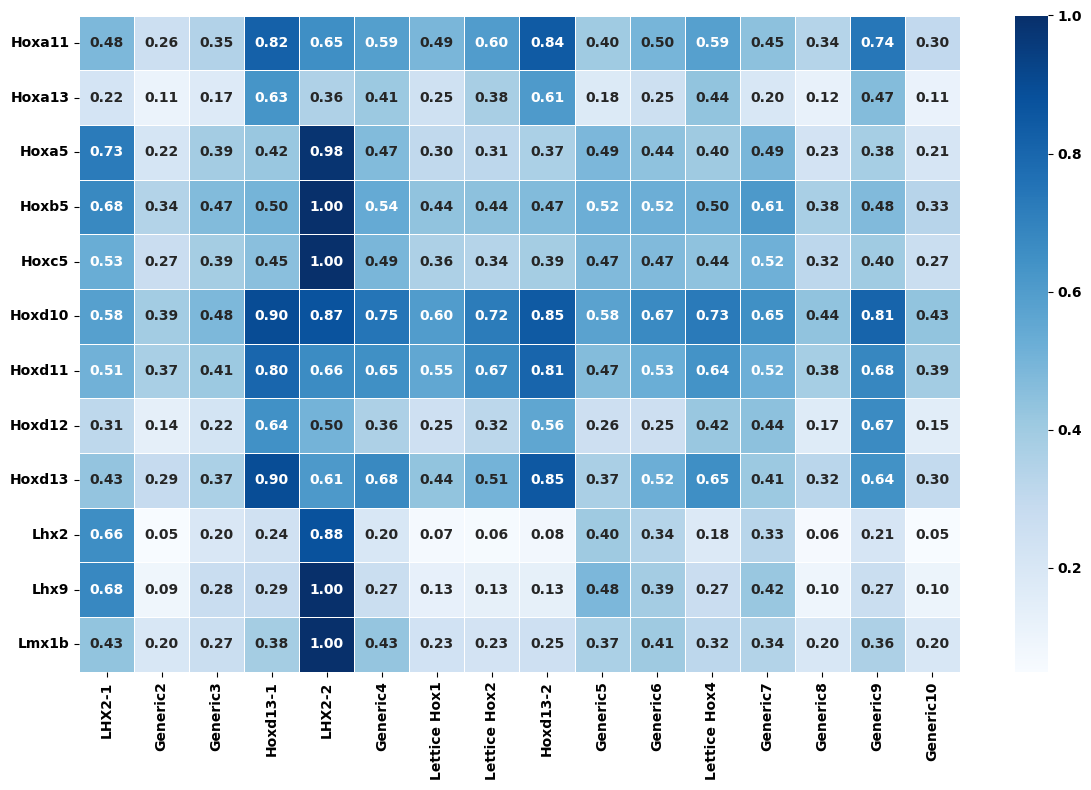

In [7]:

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(grouped.T, annot=True, fmt= ".2f", linewidths=.5, ax=ax, cmap='Blues')
plt.xlabel('')
# plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('hox_affinity_heatmap_hZRS.png', dpi=800)
